In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#選擇要預測的圖片的來源

download image

In [ ]:
import urllib.request
import os
img_url="https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"
img_name = os.path.basename(img_url)
urllib.request.urlretrieve(img_url,img_name)

('Golde33443.jpg', <http.client.HTTPMessage at 0x7fcaccadff10>)

In [ ]:
ls -l

total 212
-rw-r--r-- 1 root root 212652 May 30 04:01 Golde33443.jpg
drwxr-xr-x 1 root root   4096 May 17 13:39 sample_data/


#預處理圖片

查看照片

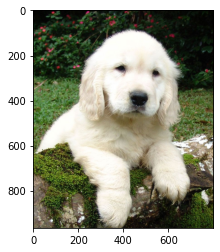

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open(img_name)
imgplot = plt.imshow(img)
plt.show()

轉換為32x32

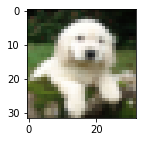

In [ ]:
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height),Image.BILINEAR)
plt.figure(figsize=(2,2))
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
x_img = image.img_to_array(img)
x_img.shape 

(32, 32, 3)

In [ ]:
import numpy as np 

In [ ]:
x_img_4d = np.expand_dims(x_img,axis=0)
x_img_4d.shape 

(1, 32, 32, 3)

normalize

In [ ]:
x_img_4d[0][0][0]

array([6., 6., 4.], dtype=float32)

In [ ]:
x_img_4d_normalize = np.array(x_img_4d) / 255 

In [ ]:
x_img_4d_normalize[0][0][0]

array([0.02352941, 0.02352941, 0.01568628], dtype=float32)

連接 gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#複製雲端硬碟模型目錄至虛擬主機

In [ ]:
!mkdir -p Model/CifarCNN/

In [ ]:
ls -l Model 

total 4
drwxr-xr-x 2 root root 4096 May 30 04:02 CifarCNN/


In [ ]:
!cp -r  drive/MyDrive/Model/CifarCNN/  Model/

In [ ]:
ls -l Model/CifarCNN/

total 8596
drwx------ 4 root root    4096 May 30 04:02 SavedModel/
-rw------- 1 root root    2777 May 30 04:02 structure.json
-rw------- 1 root root 2201576 May 30 04:02 weight.h5
-rw------- 1 root root 6586824 May 30 04:02 whole.h5


#載入模型

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
def create_model():
  model = Sequential()
  model.add(Conv2D(
      filters=32,kernel_size=(3,3),input_shape=(32, 32,3), 
      activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(
      filters=64, kernel_size=(3, 3),
      activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model
loaded_model = create_model()
path="Model/CifarCNN/"
weight_filename="weight.h5"
loaded_model.load_weights(path+weight_filename)
print("Loaded weight from："+path+weight_filename) 

Loaded weight from：Model/CifarCNN/weight.h5


In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

#輸入預處理後的影像進行預測

In [ ]:
probability=loaded_model.predict(x_img_4d_normalize) 

In [ ]:
probability

array([[5.2127653e-08, 3.5209956e-05, 8.6235366e-04, 3.1478418e-04,
        6.4803985e-06, 9.9862492e-01, 8.0119331e-05, 6.2267594e-05,
        6.4992224e-07, 1.3208670e-05]], dtype=float32)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [ ]:
prediction

array([5])

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

#顯示預測結果

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))      

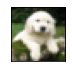

predict: dog
airplane   Probability:0.000000052
automobile Probability:0.000035210
bird       Probability:0.000862354
cat        Probability:0.000314784
deer       Probability:0.000006480
dog        Probability:0.998624921
frog       Probability:0.000080119
horse      Probability:0.000062268
ship       Probability:0.000000650
truck      Probability:0.000013209


In [ ]:
show_predicted_probability(x_img_4d_normalize,[],prediction,probability,0)